In [1]:
import pandas as pd
import re
import os
import glob

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils
import subprocess

In [101]:
from pybedtools import BedTool
def intersect_bed_files(bed_file1, bed_file2):
    bed1 = BedTool(bed_file1).sort()
    bed2 = BedTool(bed_file2).sort()

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping

In [3]:
df_dar= pd.read_csv('/data2st1/junyi/output/atac0526/dar/region_nt/mementob_dar_noccur.csv')

In [4]:
df_dar.head()   

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,...,gstart,gend,strand,annotation_x,distance,de_pval_adj,primary_region,secondary_region,darct,n_celltype
0,chr2:98662628-98663129,stim,0.297648,0.040250,1.275518e-13,-0.126407,0.107848,0.234857,Immune,PFC,...,98662236,98664083,+,genebody,0,3.038415e-12,exon,LINE,PFC_Glut/PFC_GABA,2.0
1,chrX:143482812-143483313,stim,0.367096,0.049646,1.308574e-13,0.010504,0.125507,0.992527,Immune,PFC,...,143518590,143797796,+,genebody,35278,3.114843e-12,distal,LINE,PFC_Glut/PFC_GABA,2.0
2,chr6:103648949-103649450,stim,0.297753,0.040198,1.474284e-13,-0.144116,0.094564,0.110749,Immune,PFC,...,103510585,103750211,+,genebody,0,3.496496e-12,intron,LINE,PFC_Glut/PFC_GABA,2.0
3,chr2:98662045-98662546,stim,0.314090,0.042905,2.253055e-13,-0.469675,0.251926,0.074096,Immune,PFC,...,98662236,98664083,+,genebody,0,5.274371e-12,exon,repeat,PFC_Glut/PFC_GABA,2.0
4,chr12:20815539-20816040,stim,0.679751,0.098147,5.078591e-12,-0.045391,0.226588,0.728508,Immune,PFC,...,20804380,20815779,-,genebody,0,1.072659e-10,exon,cpg,NaN,NaN


In [150]:
out_dir ='/data2st1/junyi/output/atac0526/dar/GWAS'
for ct in df_dar['ctname'].unique():
    for condition in df_dar['condition'].unique():
        df_sub = df_dar[(df_dar['ctname'] == ct) & (df_dar['condition'] == condition)]
        if len(df_sub) == 0:
            continue
        df_bed = df_sub["names"].str.split(r'[:-]', expand=True)#.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)
        df_bed.columns = ['chr', 'start', 'end']
        df_bed['oid'] = df_sub.index
        #df_bed.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)

In [12]:
# import subprocess
files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    folder_name = os.path.dirname(filename)

    #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

    command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm10ToHg19.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
    print(command_str)
    subprocess.run(command_str, shell=True)

/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/OPC-Oligo_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/HIP_GABA_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/PFC_GABA_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/AMY_GABA_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/Astro-Epen_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/AMY_Glut_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MW_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MW_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MW_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/PFC_Glut_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


/home/junyichen/liftOver /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MC_inner.bed /data2st1/junyi/mm10ToHg19.over.chain.gz /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MC_inner_lifted.bed /data2st1/junyi/output/atac0526/dar/GWAS/Immune_MC_inner_unmap.bed


Reading liftover chains
Mapping coordinates


In [ ]:
# gwas_files = glob.glob('/data1st2/junyi/data/ssf/*formatted.tsv.gz')

# for filename in gwas_files:
#     experimentname = re.split(r'[./]', filename)[5]
#     df_gwas = pd.read_csv(filename, sep='\t', compression='gzip')
#     df_gwas_selected = df_gwas[df_gwas.p_value<1e-5].loc[:, ['chromosome', 'base_pair_location','rsid']]
#     df_gwas_selected['chromosome'] = 'chr' + df_gwas_selected['chromosome'].astype(str)
#     df_gwas_selected['end'] = df_gwas_selected['base_pair_location']
#     df_gwas_selected['rsid'] = df_gwas_selected['rsid']
#     df_gwas_selected = df_gwas_selected.loc[:, ['chromosome', 'base_pair_location', 'end', 'rsid']]
#     df_gwas_selected.to_csv(f'/data2st1/junyi/output/atac0526/dar/GWAS/{experimentname}_1e5.bed', sep='\t', header=False, index=False)

In [187]:
gwas_beds = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*1e5.bed')
lifted_files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*_lifted.bed')
df_snp_all = pd.DataFrame(columns=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas', 'experiment', 'gwas'])
for gwas_bed in ['/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted_1e5.bed']:
    for lifted_file in lifted_files:
        experimentname = re.split(r'[./]', lifted_file)[-2]
        merged, non_overlapping = intersect_bed_files(lifted_file, gwas_bed)

        df_merged = merged.to_dataframe(names=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas','rsid'])
        #df_merged.loc[:,['start','end','start_gwas','end_gwas']] = df_merged.loc[:,['start','end','start_gwas','end_gwas']].astype(int)
        df_merged['experiment'] = experimentname
        
        df_merged['gwas'] = os.path.basename(gwas_bed)

        df_snp_all = pd.concat([df_snp_all, df_merged], ignore_index=True)

In [205]:
df_gwas= pd.read_csv('/data1st2/junyi/data/ssf/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted.tsv.gz',sep='\t', compression='gzip')

In [208]:
df_gwas['-log10(P-value)'] = -np.log10(df_gwas['p_value'])

In [210]:
df_gwas[df_gwas.rsid=="rs670143"]

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,rsid,info,effect_allele_frequency_cases,n,ncases,ncontrols,heterogeneity_i2,heterogeneity_df,heterogeneity_p_value,-log10(P-value)
286362,1,176176495,A,G,0.0141,0.0028,0.35,5.418000e-07,rs670143,0.991,0.351,1250936.82,444303,1929553,0.0,26,0.5221,6.266161


In [219]:
df_snp_all_sorted = df_snp_all.sort_values(by='start').sort_values(
    by='chr',
    key=lambda x: x.str.replace('chr','').astype(int)
)

In [224]:
df_snp_all_sorted = df_snp_all_sorted.merge(df_gwas[['rsid', '-log10(P-value)']], left_on='rsid', right_on='rsid', how='left').sort_values('-log10(P-value)',ascending=False)

In [261]:
df_snp_all_sorted

,chr,start,end,oid,chromosome,start_gwas,end_gwas,experiment,gwas,rsid,-log10(P-value)
308,chr7,1883179,1883717,38408,chr7,1883274,1883274,Astro-Epen_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs58169303,18.821311
179,chr3,49210212,49210739,69627,chr3,49210732,49210732,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7617480,17.836540
142,chr3,49577096,49577703,103923,chr3,49577665,49577665,OPC-Oligo_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
132,chr3,49577096,49577703,80130,chr3,49577665,49577665,HIP_GABA_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
134,chr3,49577096,49577703,67523,chr3,49577665,49577665,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
...,...,...,...,...,...,...,...,...,...,...,...
98,chr2,99347305,99348054,21841,chr2,99347917,99347917,OPC-Oligo_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7420869,5.005199
99,chr2,99347305,99348054,15976,chr2,99347917,99347917,Immune_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7420869,5.005199
101,chr2,99347305,99348054,94021,chr2,99347917,99347917,HIP_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7420869,5.005199
100,chr2,99347305,99348054,42410,chr2,99347917,99347917,Astro-Epen_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7420869,5.005199


In [ ]:
#df_snp_all_sorted.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted_1e5_lifted_intersected.csv')

,chr,start,end,oid,chromosome,start_gwas,end_gwas,experiment,gwas,rsid,-log10(P-value)
308,chr7,1883179,1883717,38408,chr7,1883274,1883274,Astro-Epen_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs58169303,18.821311
179,chr3,49210212,49210739,69627,chr3,49210732,49210732,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7617480,17.836540
142,chr3,49577096,49577703,103923,chr3,49577665,49577665,OPC-Oligo_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
132,chr3,49577096,49577703,80130,chr3,49577665,49577665,HIP_GABA_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
134,chr3,49577096,49577703,67523,chr3,49577665,49577665,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
128,chr3,49577096,49577703,142970,chr3,49577665,49577665,AMY_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
131,chr3,49577096,49577703,20471,chr3,49577665,49577665,Immune_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
176,chr3,49577096,49577703,110946,chr3,49577665,49577665,Immune_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
129,chr3,49577096,49577703,148240,chr3,49577665,49577665,AMY_GABA_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
173,chr3,49577096,49577703,85827,chr3,49577665,49577665,HIP_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932


In [263]:
df_dar_gwas = df_dar.iloc[df_snp_all_sorted.oid]

In [269]:
df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
df_dar_gwas['rsid'] = df_snp_all_sorted['rsid'].values
df_dar_gwas['-log10p_gwas'] = df_snp_all_sorted['-log10(P-value)'].values
df_dar_gwas['gwas_data'] = df_snp_all_sorted['gwas'].values

/tmp/ipykernel_1915955/3479497382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
/tmp/ipykernel_1915955/3479497382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
/tmp/ipykernel_1915955/3479497382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [271]:
df_dar_gwas.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted_1e5_result.csv', index=False)

In [212]:
df = df_gwas.sort_values(["chromosome", "base_pair_location"])   # Sort by chromosome and position
df["index"] = range(len(df))           # Add index for x-axis


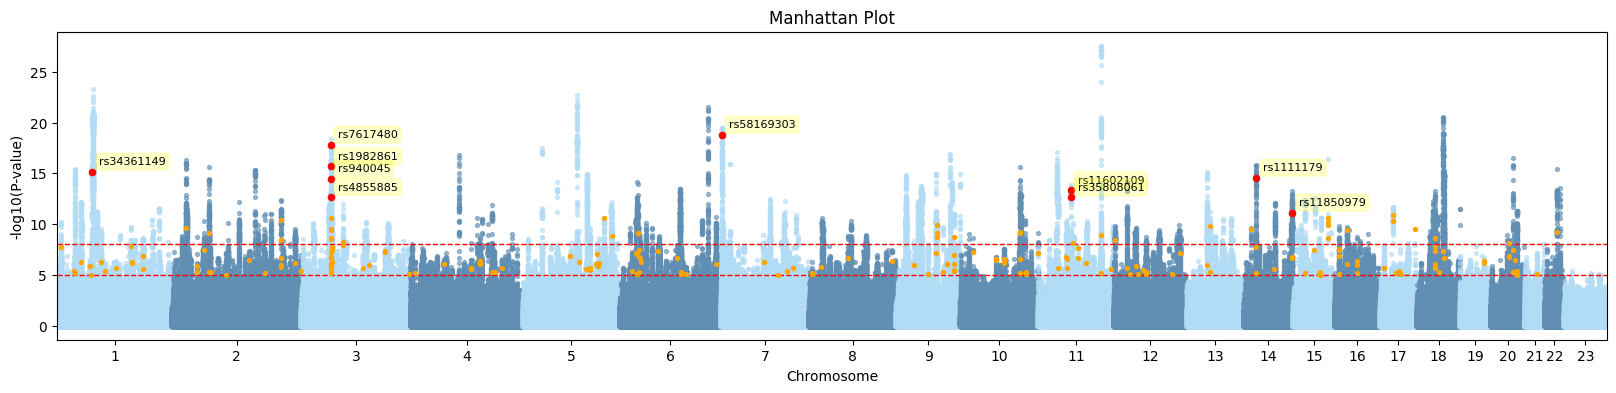

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
colors = ["#618eb3", "#b2dcf5"]  # Alternating colors
for chrom, group in df.groupby("chromosome"):
    color = colors[chrom % 2]     # Alternate colors
    plt.scatter(group["index"], group["-log10(P-value)"], color=color, s=8, alpha=0.6)

# Add significance threshold
plt.axhline(y=-np.log10(1e-8), color="r", linestyle="--", linewidth=1)
plt.axhline(y=-np.log10(1e-5), color="r", linestyle="--", linewidth=1)


highlight_ids = list(set(df_snp_all_sorted.drop_duplicates(['rsid']).head(10)['rsid'].values))  # Replace with your SNP IDs
highlight_df = df[df["rsid"].isin(highlight_ids)]


overlap_ids = list(set(df_snp_all_sorted['rsid'].values))
overlap_df = df[df["rsid"].isin(overlap_ids)]

plt.scatter(
    overlap_df["index"], 
    overlap_df["-log10(P-value)"], 
    color="orange",          # Fill color
   # marker="*",           # Star-shaped marker
    s=8,                # Size
    #edgecolors="black",   # Bold border
    #linewidths=1.5,       # Border thickness
    zorder=3              # Ensure points appear on top
)


plt.scatter(
    highlight_df["index"], 
    highlight_df["-log10(P-value)"], 
    color="red",          # Fill color
   # marker="*",           # Star-shaped marker
    s=20,                # Size
    #edgecolors="black",   # Bold border
    #linewidths=1.5,       # Border thickness
    zorder=3              # Ensure points appear on top
)

for _, row in highlight_df.iterrows():
    plt.annotate(
        row["rsid"],                          # SNP ID as text
        xy=(row["index"], row["-log10(P-value)"]),  # Coordinates of the point
        xytext=(5, 5),                        # Offset from the point (in points)
        textcoords="offset points",           # Coordinate system for xytext
        fontsize=8,
        bbox=dict(boxstyle="round", alpha=0.2, color="yellow"),  # Optional background
        zorder=4                              # Ensure labels appear above points
    )


plt.xlabel("Chromosome")
plt.ylabel("-log10(P-value)")
plt.title("Manhattan Plot")

# Customize x-axis ticks (optional)
chrom_df = df.groupby("chromosome")["index"].median()
plt.xticks(chrom_df, chrom_df.index)
plt.xlim(0, len(df))


plt.show()


In [193]:
df.head()

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,rsid,info,effect_allele_frequency_cases,n,ncases,ncontrols,heterogeneity_i2,heterogeneity_df,heterogeneity_p_value,-log10(P-value),index
0,1,800193,A,T,0.044199,0.0443,0.948,0.31870,rs143609865,0.686,0.952,37103.56,16218,33136,0.0,4,0.6891,0.496618,0
1,1,801536,T,G,0.055596,0.0619,0.982,0.36920,rs79373928,0.919,0.984,37103.56,16218,33136,0.0,4,0.8365,0.432738,1
2,1,824398,A,C,0.046998,0.0283,0.863,0.09605,rs7538305,0.650,0.870,35493.76,15797,24002,0.0,3,0.5226,1.017503,2
3,1,828539,A,T,-0.034695,0.0668,0.981,0.60360,rs149168804,0.718,0.980,37103.56,16218,33136,0.0,4,0.6442,0.219251,3
4,1,828883,G,A,0.022202,0.0355,0.920,0.53210,rs55745762,0.703,0.924,37103.56,16218,33136,0.0,4,0.7237,0.274007,4


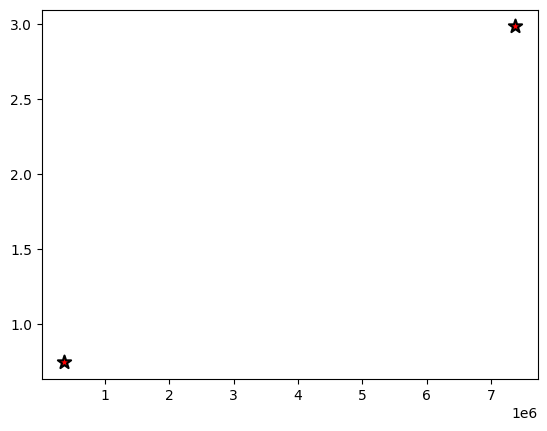

In [65]:
merged, non_overlapping = intersect_bed_files('/data2st1/junyi/output/atac0526/dar/GWAS/pgc_mdd_gwas_1e5.bed', '/data2st1/junyi/output/atac0526/dar/GWAS/HIP_Glut_MC_inner_lifted.bed')

In [173]:
merged.to_dataframe()

,chrom,start,end,name,score,strand,thickStart
0,chr1,33829440,33829999,135127,chr1,33829731,33829731
1,chr1,49339435,49339943,109577,chr1,49339602,49339602
2,chr1,67390339,67390867,100789,chr1,67390416,67390416
3,chr1,67390339,67390867,100789,chr1,67390468,67390468
4,chr1,87379934,87380455,101951,chr1,87379986,87379986
5,chr1,173836961,173837505,101582,chr1,173837051,173837051
6,chr1,176176122,176176708,104743,chr1,176176495,176176495
7,chr11,46259189,46259777,104453,chr11,46259550,46259550
8,chr11,57435046,57435541,136191,chr11,57435296,57435296
9,chr11,57435046,57435541,101268,chr11,57435296,57435296


In [ ]:
files = glob.glob('/data2st1/junyi/output/atac0416/dar/motif/region_nt/*_inner.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/atac0416/dar/motif/region_nt/','--write_html']
    print(command_str)
    subprocess.run(command_str)

In [ ]:
files = glob.glob('/data2st1/junyi/output/atac0416/dar/motif/region_nt/*_memento.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/atac0416/dar/motif/region_nt/','--write_html']
    print(command_str)
    subprocess.run(command_str)

In [ ]:
ax = sns.countplot(data=df_DAR_mememto, x='ctname', hue='condition', dodge=False, palette='Set2',)
plt.ylim(0, 5000)


In [ ]:
for ct in df_inner['ctname'].unique():
    for condition in df_inner['condition'].unique():
        try:
            flist = glob.glob(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/*{ct}*{condition}*_inner.hdf5')
            df_report = utils.conclude_pycistargets(flist)  
            df_report_annotation = utils.annotate_region(df_report,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')
            df_report_annotation.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_inner_region_TF.csv', index=False)
        except Exception as e:
            print(f"Error processing {ct} and {condition}: {e}")


In [ ]:
df_join_all_TFs = pd.DataFrame()
for ct in df_DAR_mememto['ctname'].unique():
    for condition in df_DAR_mememto['condition'].unique():
        try:
            #flist = glob.glob(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/*{ct}*{condition}*_memento.hdf5')
            #df_report = utils.conclude_pycistargets(flist)  
            #df_report_annotation = utils.annotate_region(df_report,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')
            #df_report.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF.csv', index=False)
            df_test= pd.read_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF.csv')
            df_test['TFs'] = df_test['TFs'].str.replace(r'["\'}{}]|,?\s*nan\s*,?', '', regex=True).str.replace(r' ', '', regex=True).str.strip(",")
            df_join_TFs=df_test[['region','TFs']].groupby(['region']).aggregate(
                lambda x: "/".join(                        # Join aggregated values with '/'
                    sorted(
                        set(                                          # Keep unique values
                            item for sublist in x.str.split(",")      # Split each string by '.'
                            for item in sublist                       # Flatten the split lists
                        )# Remove empty strings
                    )
                )
            ).reset_index()
            df_join_TFs["TFs"]=df_join_TFs.TFs.str.strip('/')

            df_join_TFs["motifs"]=df_test[['region','motif']].groupby(['region']).aggregate(
                lambda x:'/'.join(x)
            ).reset_index()["motif"]
            df_join_TFs["ctname"]="_".join(df_test.key[0].split('_')[:2])
            df_join_TFs["condition"] = df_test.key[0].split('_')[2]
            df_join_TFs["method"] = df_test.key[0].split('_')[3]
            df_join_all_TFs = pd.concat([df_join_all_TFs, df_join_TFs], axis=0, ignore_index=True)
            #df_join_TFs.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/{ct}_{condition}_memento_TF_join.csv', index=False)


        except Exception as e:
            print(f"Error processing {ct} and {condition}: {e}")


In [ ]:
df_join_all_TFs

In [ ]:
df_annotated_TFs = utils.annotate_region(df_join_all_TFs,region_col='region', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
df_annotated_TFs['brain_region'] = df_annotated_TFs['ctname'].str.split(r'[_]').str[0]

In [ ]:
df_annotated_TFs.to_csv(f'/data2st1/junyi/output/atac0416/dar/motif/region_nt/motif_memento_TFs.csv', index=False)

In [ ]:
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover

    temp_df = df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True)
    temp_df['ID'] = temp_df.index
    temp_df.to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
# import subprocess
# files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR.bed')
# for filename in files:
#     experimentname = re.split(r'[./]', filename)[-2]
#     folder_name = os.path.dirname(filename)

#     #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

#     command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
#     print(command_str)
#     subprocess.run(command_str, shell=True)

In [ ]:
import subprocess

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !sort -k1,1 -k2,2n /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted.bed > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
# !bedtools closest -a /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/HIP_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted.bed')
for filename in files:
    command_str = ['pycistarget','cistarget','--cistarget_db_fname','/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather'
                   ,'--bed_fname',filename,'--species','mus_musculus','--auc_threshold','0.005','--nes_threshold','3.0','--rank_threshold','0.05'
                   ,'--path_to_motif_annotations','/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl'
                   ,'--output_folder','/data2st1/junyi/output/motif/','--write_html']
    print(command_str)
    subprocess.run(command_str)
    
# !pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
# --bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
# --species 'mus_musculus' \
# --auc_threshold 0.005 \
# --nes_threshold 3.0 \
# --rank_threshold 0.05 \
# --path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
# --output_folder '/data2st1/junyi/output/motif/' \
# --write_html 

In [ ]:
import h5py
dict_table = {}
cell_types = ['Neuron','Astro-Epen','Vascular','Immune','OPC-Oligo']
for celltype in cell_types:
    with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_ALL_{celltype}_wilcoxon_DAR_lifted.hdf5', 'r') as f:
        # Open the HDF5 file
        # List all groups and datasets in the file
        print("Keys in the file:", list(f.keys()))
        

        # # Access a specific dataset
        expname = f'ALL_{celltype}_wilcoxon_DAR_lifted'
        dataset = f[expname]  # Replace with your dataset name
        # print("Shape of the dataset:", dataset.shape)
        # print("Data type of the dataset:", dataset.dtype)
        dict_dataset = {}
        #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

        table = f[expname]['motif_enrichment']['table'][:]
        for key in dataset.keys():
            dict_dataset[key] = dataset[key]
        # print("Data:", data)
        dict_table[expname] = table

In [ ]:
for keys in dict_table.keys():
    print(keys)
    print(dict_table[keys][:5])
    #Astro : id, orthology, direcrt, id, msimilarity,logo
    #Neuron : id,logo,orthology, id, direct, msimilarity
    #Vascular : id,logo,orthology,msimilarity,id, direct

In [ ]:
list_table = []
list_key = []
list_TFs = []

df_TF_celltype = pd.DataFrame()

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0].decode('utf-8'))
        list_key.append(key)
        TFs_tmp=[]
        for i in range(1, len(row)-2):
            if 'img' in row[i][0].decode('utf-8') or 'wilcoxon' in row[i][0].decode('utf-8'):
                continue
            TFs_tmp+=([ tf.decode('utf-8') for tf in row[i]])

        df_tfs = pd.DataFrame({'TF':",".join(TFs_tmp).split(',')})
        df_tfs['NES'] = row[-2][0]
        df_tfs['AUC'] = row[-2][1]
        df_tfs['Rank'] = row[-2][2]
        df_tfs['celltype.L1'] = key.split('_')[1]
        df_tfs['id'] = row[0].decode('utf-8')

        list_TFs.append(set(TFs_tmp))
        df_TF_celltype = pd.concat([df_TF_celltype,df_tfs],axis=0)
        
df_TF = pd.DataFrame({'TF':list_table,'key':list_key,'TFs':list_TFs})

In [ ]:
df_TF_celltype.drop_duplicates(inplace=True)


In [ ]:
df_TF_celltype

In [ ]:
df_RSS = pd.read_csv("/home/junyichen/code/scmmd/data/RSS_Score(only pos).csv",index_col=0)

In [ ]:
df_RSS['TF']=df_RSS['Topic'].str.replace('[()+]','')

In [ ]:
cell_to_category = {
    # Astro-Epen
    'Astro-Gfaphigh': 'Astro-Epen',
    'Astro-TE': 'Astro-Epen',
    
    # Immune
    'Microglia': 'Immune',
    'PVM': 'Immune',
    
    # Neuron
    'L2/3 IT': 'Neuron',
    'L4/5 IT': 'Neuron',
    'L5 ET': 'Neuron',
    'L6 CT': 'Neuron',
    'L6 IT': 'Neuron',
    'L6b': 'Neuron',
    'Lamp5 GABA': 'Neuron',
    'Pvalb GABA': 'Neuron',
    'Pvalb Vipr2 GABA': 'Neuron',
    'Sst GABA': 'Neuron',
    'Vip GABA': 'Neuron',
    
    # OPC-Oligo
    'COP': 'OPC-Oligo',
    'MFOL': 'OPC-Oligo',
    'MOL': 'OPC-Oligo',
    'NFOL': 'OPC-Oligo',
    'NP': 'OPC-Oligo',
    'OPC': 'OPC-Oligo',
    
    # Vascular
    'Arachnoid barrier cell': 'Vascular',
    'Car3': 'Vascular',
    'Endothelial cell': 'Vascular',
    'Pericyte': 'Vascular',
    'VLMC': 'Vascular'
}

In [ ]:
df_RSS['celltype.L1'] = df_RSS['celltype.L2'].map(cell_to_category)


In [ ]:
df_TF_celltype.groupby(['celltype.L1']).nunique()

In [ ]:
df_RSS.groupby(['celltype.L1']).nunique()

In [ ]:
df_merged = df_RSS.merge(df_TF_celltype,left_on=['TF','celltype.L1'],right_on=['TF','celltype.L1'],how='inner')

In [ ]:
df_merged.sort_values(by='RSS',ascending=False,inplace=True)

In [ ]:
df_merged.drop_duplicates(set(['TF','celltype.L1']),keep='first').to_csv('/data2st1/junyi/output/motif/TF_RSS.csv',index=False)

In [ ]:
df_merged.groupby('celltype.L1').nunique()

In [ ]:
ct = pd.crosstab(df_merged['celltype'],df_merged['celltype.L1'],values=df_merged['RSS'],aggfunc='count')

In [ ]:
ct

In [ ]:
set(df_merged['celltype']
)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/ALL_*_wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
# !bedtools closest -a /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_lifted_sorted.bed -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > /data2st1/junyi/output/motif/PFC_Neuron_MC_wilcoxon_DAR_gene.bed

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html 

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon.csv')
for filename in files:
    df_dar  = pd.read_csv(filename,index_col=0)
    experimentname = re.split(r'[./]', filename)[-2]
    experimentname
    folder_name = os.path.dirname(filename)
    df_dar_filtered = df_dar[(df_dar['pvals']<0.05) & (df_dar['logfoldchanges']>0) ]
    df_dar_filtered.sort_values(by='logfoldchanges',ascending=False,inplace=True)
    # For liftover
    df_dar_filtered.names.str.split(r'[ ,!\-;:|]',expand=True).to_csv(f"{folder_name}/{experimentname}_DAR.bed",header=False,index=False,sep="\t")

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    folder_name = os.path.dirname(filename)

    #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

    command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm39ToMm10.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted.bed')
for filename in files:
    destname = filename.replace("_lifted.bed","_lifted_sorted.bed")
    #!sort -k1,1 -k2,2n {filename} > {destname}
    command_str = f"sort -k1,1 -k2,2n {filename} > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted.bed')
for filename in files:
    destname = filename.replace("_lifted_sorted.bed","_lifted_sorted_gene.bed")
    command_str = f"bedtools closest -a {filename} -b /data2st1/junyi/output/motif/genebody_selected_sorted.bed -D ref > {destname}"
    print(command_str)
    subprocess.run(command_str, shell=True)

In [ ]:
# from pyliftover import LiftOver
# lo = LiftOver('/data2st1/junyi/mm10ToMm39.over.chain.gz')
# lo.convert_coordinate('chr1', 1000000, '-')


In [ ]:
result_frame = pd.DataFrame()
files = glob.glob('/data2st1/junyi/output/motif/*MW*wilcoxon_DAR_lifted_sorted_gene.bed')
for filename in files:
    experimentname = re.split(r'[./]', filename)[-2]
    region = re.split(r'_',experimentname)[0]
    celltype = re.split(r'_',experimentname)[1]
    condition = re.split(r'_',experimentname)[2]
    try:
        df = pd.read_csv(filename,sep='\t',header=None)
    except:
        continue
    df.columns = ['chrom','start','end','chrom2','start2','end2','score','starnd','gene_name','gene_id','annotation','distance']
    df['region'] = region
    df['celltype'] = celltype
    df['condition'] = condition
    df['name'] = df['chrom'] + ':' + df['start'].astype(str) + '-' + df['end'].astype(str)
    # df_score = pd.read_csv(f"/data2st1/junyi/output/motif/{region}_{celltype}_{condition}_wilcoxon.csv",index_col=0)
    # df['logfoldchanges'] = df_score.set_index('names').loc[df['name'],'logfoldchanges'].values
    # df['pvals'] = df_score.set_index('names').loc[df['name'],'pvals'].values
    result_frame = pd.concat([result_frame,df])

In [ ]:
ax = sns.countplot(data=result_frame, x='celltype', hue='region', dodge=False, palette='Set2',)
ax.set_ylim(0,6000)


In [ ]:
keep1=result_frame.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])
keep1['generegion'] = 'genebody'
#keep1.loc[keep1['distance']<0,'generegion'] = 'downstream'
promoter = keep1.loc[(keep1['distance']>0) & (keep1['distance']<=2000) & (keep1['starnd']=='+')].index
distal = keep1.loc[(keep1['distance']>0) & (keep1['distance']>=2000) & (keep1['starnd']=='+')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'

promoter = keep1.loc[(keep1['distance']<0) & (keep1['distance']>=-2000) & (keep1['starnd']=='-')].index
distal = keep1.loc[(keep1['distance']<0) & (keep1['distance']<=-2000) & (keep1['starnd']=='-')].index
keep1.loc[promoter,'generegion'] = 'promoter'
keep1.loc[distal,'generegion'] = 'distal'


In [ ]:
keep1=keep1.loc[keep1['start2']>0]

In [ ]:
keep1.sort_values(by='starnd',ascending=True).drop_duplicates(subset=['chrom','start','end'])

In [ ]:
ax = sns.countplot(data=keep1, x='celltype', hue='generegion', dodge=False, palette='Set2',)

In [ ]:
pd.read_csv('/data2st1/junyi/output/motif/AMY_Neuron_MC_wilcoxon.csv',index_col=0)

In [ ]:
# Convert hg38 to hg19
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed
# !/home/junyichen/liftOver /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_unmap.bed


In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/HIP_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/AMY_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
!pycistarget cistarget --cistarget_db_fname '/data2st1/junyi/scenic/mouse/motif/mm10_screen_v10_clust.regions_vs_motifs.rankings.feather' \
--bed_fname '/data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed' \
--species 'mus_musculus' \
--auc_threshold 0.005 \
--nes_threshold 3.0 \
--rank_threshold 0.05 \
--path_to_motif_annotations '/data2st1/junyi/scenic/mouse/motif/motifs-v10nr_clust-nr.mgi-m0.001-o0.0.tbl' \
--output_folder '/data2st1/junyi/output/motif/' \
--write_html

In [ ]:
import h5py
import copy

regions = ['AMY','HIP','PFC']
celltypes = ['Neuron']

dict_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][0:10]

            table = f[expname]['motif_enrichment']['table'][:]
            for key in dataset.keys():
                dict_dataset[key] = dataset[key]
            # print("Data:", data)
            dict_table[expname] = table

In [ ]:
for i in dict_table['AMY_Neuron_MC_wilcoxon_DAR_lifted']:
    print(i[0])

In [ ]:
region_table = {}

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)

            dict_dataset = {}

            region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            region_table[expname] = region

In [ ]:
import numpy as np

list_table = []
list_key = []

for key in dict_table.keys():
    data = dict_table[key]
    for row in data:
        list_table.append(row[0])
        list_key.append(key)
df_TF = pd.DataFrame({'TF':list_table,'key':list_key})

In [ ]:
df_TF

In [ ]:
df_count = df_TF.groupby('TF').count().sort_values(by='key',ascending=False)

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions = pd.DataFrame()

for region in regions:
    for celltype in celltypes:
        with h5py.File(f'/data2st1/junyi/output/motif/motif_enrichment_cistarget_{region}_{celltype}_MC_wilcoxon_DAR_lifted.hdf5', 'r') as f:
            # Open the HDF5 file
            # List all groups and datasets in the file
            print("Keys in the file:", list(f.keys()))
            

            # # Access a specific dataset
            expname = f'{region}_{celltype}_MC_wilcoxon_DAR_lifted'
            dataset = f[expname]  # Replace with your dataset name
            # print("Shape of the dataset:", dataset.shape)
            # print("Data type of the dataset:", dataset.dtype)


            for TF in df_count[df_count['key']>2].index:
                region = f[expname]['motif_hits']['region_set'][TF][:]
                decoded_data = [item.decode('utf-8') for item in region]
                df_region = pd.DataFrame(decoded_data,columns=['region'])
                df_region['expreiment'] = expname
                df_region['TF'] = TF.decode('utf-8')
                if len(df_regions)>0:
                    df_regions = pd.concat([df_regions,df_region],axis=0,ignore_index=True)
                else:
                    df_regions = df_region
            #region = f[expname]['motif_hits']['region_set']['metacluster_33.8'][:]
            #region_table[expname] = df_regions

In [ ]:
df_count[df_count['key']>2].index

In [ ]:
df_regions.head(10)

In [ ]:
region_table

In [ ]:
sns.countplot(data=df_TF, x='key', dodge=False, palette='Set2',)
plt.xticks(rotation=60)


In [ ]:
for key in dict_table.keys():
    print(len(dict_table[key]))

In [ ]:
table